$\textbf{Modelo de la regla de la mayoria}$

El modelo de la mayoria es una dinamica de opinion que describe la modificación en la opinión de los individuos de un espacio de votantes en función de la cantidad de personas que que comparten o no cierta opinión, esto se estudia particularmente en el contexto de cómo en los debates públicos se puede propagar la opinión de un grupo que en principio es minoritario.

El modelo se basa en el supuesto de que  las personas tienden a ser parte de mayorías o más bien tienden a acoplarse a ellas lo cual en intervalos determinados de tiempo forman consensos en el sistema, una descripción apropiada de este modelo viene dado por la consideración de un sistema Constituido por $N$ integrantes con $N_{+}(t)$ individuos con una opinión binaria arbitraria y $N_{-}(t)$ individuos con la opinión contraria, relación que dispuesta en la siguiente ecuación:

$$N_{+}(t) + N_{-}(t) = N$$

De esta forma entonces la probabilidad de encontrar una persona con una opinión positiva o negativa viene dada como:

$$ P_{\pm} (t) = \frac{N_{\pm}(t)}{N} $$

con:

$$ P_{+} (t) + P_{-} (t) = 1 $$

En función de esta proposición los individuos comienzan a discutir la propuesta en los distintos grupos sociales con los que interactúan , siendo $i$ el tamaño de un grupo arbitrario , la geometría de estos grupos es aleatoria aunque definida en la distribución de probabilidades $a_{i}$ , que cumple la relación:

$$\sum_{i=1}^L a_i=1$$, con L siendo el grupo más grande.

Así la probabilidad de que el individuo haya cambiado su opinión en un tiempo $t+1$ según la opinión de la mayoría, viene dada como:

$$P_{+}(t+1) = \sum_{k=1}^{L} a_k \sum_{j=N[k/2 + 1]}^{k} C_{j}^{k} P_{+}(t)^{j}P_{-}^{k-j}$$,

$$P_{-}(t+1) = \sum_{k=1}^{L} a_k \sum_{j=N[k/2 + 1]}^{k} C_{j}^{k} P_{-}(t)^{j}P_{+}^{k-j}$$,

con $C_{j}^{k} = \frac{k!}{(k-j)!j!}$ y $N[k/2 + 1]$ la parte entera de $k/2 + 1$.

Se hará una $\textbf{simulación}$ de este modelo bajo las variables del tamaño del sistema $N$ y el conjunto de probabilidades $a_n$ así La probabilidad $P_{+}(t)$ se entrega en un intervalo entre 0 y 1. La función itera el modelo para la cantidad de elementos que tenga la lista en la que se define el intervalo. Se calcula $P_{+}(t+1)$ para cada uno de estos puntos, y finalmente se grafica dos veces para dos simulaciones distintas: una para un individuo que frecuentó seis grupos (línea roja) y otra para un individuo que frecuentó tres (línea azul), (con los parámetros dispuestos en el artículo de referencia).


Tiempo ocupado (h:m:s:ns): 0:00:00.003000
Tiempo ocupado (h:m:s:ns): 0:00:00.002000


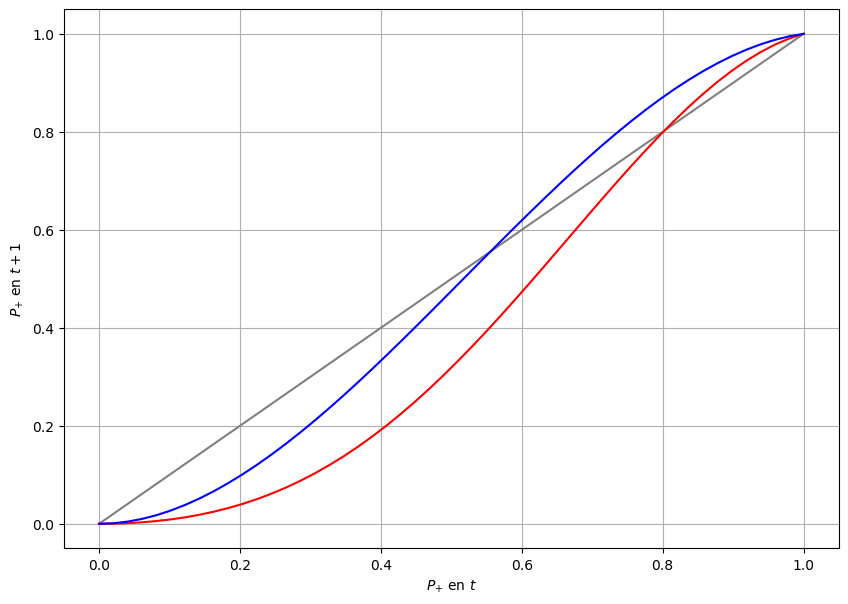

In [16]:
# SIMULACION: MODELO DE LA REGLA DE LA MAYORIA-----------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.auto import tqdm

def majority_rule_model(N, a_n, P_t): 
    
    # INICIO CONTADOR TEMPORAL
    tini = datetime.now()
    
    # CONDICION INICIAL
    P_t1_list = [0] * len(P_t)
    L = len(a_n)
    
    # ALGORITMO
    for i in range(len(P_t)):
        P_t1 = 0
        for k in range(1,L+1):
            s2 = 0
            for j in range(int(np.rint((k/2)+1)),k+1):
                C = (np.math.factorial(k))/((np.math.factorial(k-j)*np.math.factorial(j)))
                s2 += C * (P_t[i]**j) * ((1 - P_t[i])**(k-j))
            P_t1 += a_n[k-1] * s2 # P_{+}(t+1)
        P_t1_list[i] = P_t1
        
    # FIN CONTADOR TEMPORAL
    tfin = datetime.now()
    dtie = tfin - tini
    print('Tiempo ocupado (h:m:s:ns):', dtie)
    
    return P_t1_list

P_t = np.linspace(0,1,50)

red_line = majority_rule_model(6, [0.2,0.2,0.2,0.2,0.2,0.2], P_t)
blue_line = majority_rule_model(3,[0,0.1,0.9], P_t)

# CONFIGURACION FIGURA
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

# FIGURA
ax.plot([0,1],[0,1],color='gray')
ax.plot(P_t, red_line, color='red')
ax.plot(P_t, blue_line, color='blue')
ax.set_xlabel("$P_{+}$ en $t$")
ax.set_ylabel("$P_{+}$ en $t+1$")
ax.grid()
plt.show()